In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [118]:
#Loading the data
data = pd.read_csv("house_price_regression_dataset.csv")
print(data.head())

   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


In [119]:
#Let's understand the data
data.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [120]:
#Square_Footage: The size of the house in square feet. Larger homes typically have higher prices.
#Num_Bedrooms: The number of bedrooms in the house. More bedrooms generally increase the value of a home.
#Num_Bathrooms: The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.
#Year_Built: The year the house was built. Older houses may be priced lower due to wear and tear.
#Lot_Size: The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property.
#Garage_Size: The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.
#Neighborhood_Quality: A rating of the neighborhood’s quality on a scale of 1-10, where 10 indicates a high-quality neighborhood. Better neighborhoods usually command higher prices.
#House_Price (Target Variable): The price of the house, which is the dependent variable you aim to predict.

data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

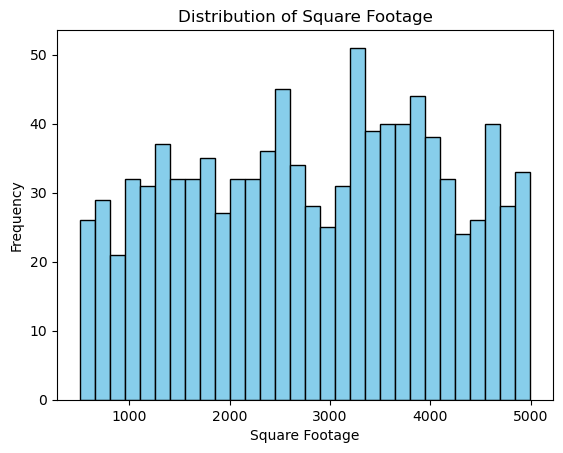

In [121]:
#There are no missing values
#Let's start univariate analysis

fig, ax = plt.subplots()
data["Square_Footage"].plot(kind="hist", ax=ax, bins=30, color='skyblue', edgecolor='black')
ax.set_title("Distribution of Square Footage")
ax.set_xlabel("Square Footage")
ax.set_ylabel("Frequency")
plt.show()

In [122]:
data["Num_Bedrooms"].value_counts()

Num_Bedrooms
2    215
5    205
1    201
4    197
3    182
Name: count, dtype: int64

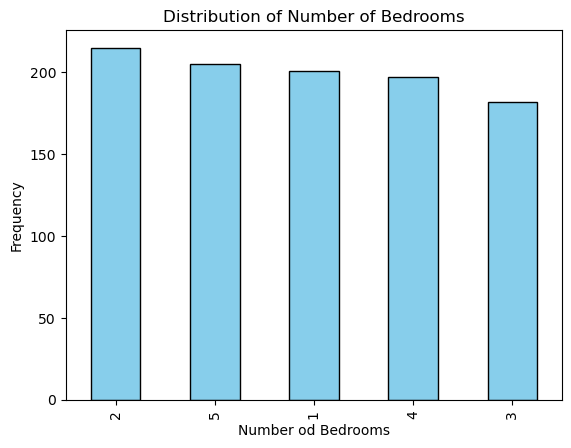

In [123]:
fig, ax = plt.subplots()
data["Num_Bedrooms"].value_counts().plot(kind="bar", ax=ax, color='skyblue', edgecolor='black')
ax.set_title("Distribution of Number of Bedrooms")
ax.set_xlabel("Number od Bedrooms")
ax.set_ylabel("Frequency")
plt.show()

In [124]:
#Approximately, we have the same number of bedrooms for each group.

data["Num_Bathrooms"].value_counts()

Num_Bathrooms
1    350
2    327
3    323
Name: count, dtype: int64

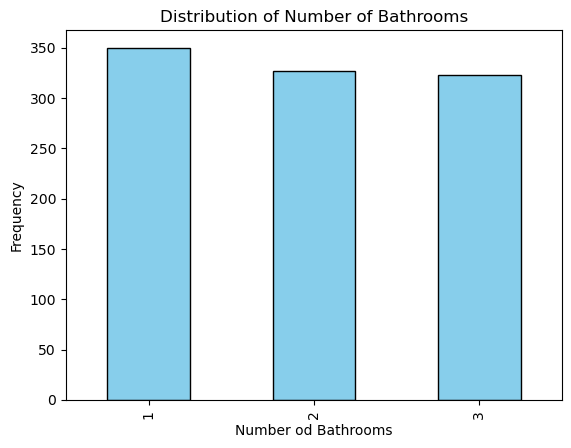

In [125]:
fig, ax = plt.subplots()
data["Num_Bathrooms"].value_counts().plot(kind="bar", ax=ax, color='skyblue', edgecolor='black')
ax.set_title("Distribution of Number of Bathrooms")
ax.set_xlabel("Number od Bathrooms")
ax.set_ylabel("Frequency")
plt.show()

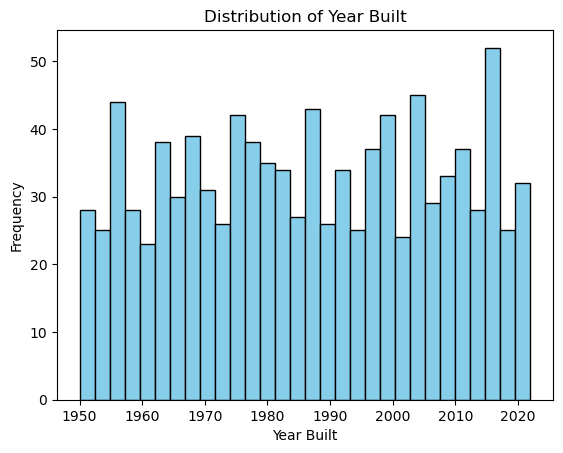

In [126]:
#Same with number of bathrooms

fig, ax = plt.subplots()
data["Year_Built"].plot(kind="hist", ax=ax, bins=30, color='skyblue', edgecolor='black')
ax.set_title("Distribution of Year Built")
ax.set_xlabel("Year Built")
ax.set_ylabel("Frequency")
plt.show()

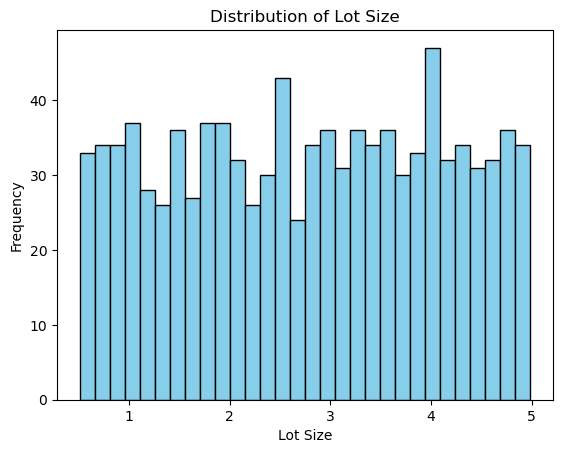

In [127]:
fig, ax = plt.subplots()
data["Lot_Size"].plot(kind="hist", ax=ax, bins=30, color='skyblue', edgecolor='black')
ax.set_title("Distribution of Lot Size")
ax.set_xlabel("Lot Size")
ax.set_ylabel("Frequency")
plt.show()

In [128]:
data["Garage_Size"].value_counts()

Garage_Size
2    343
1    336
0    321
Name: count, dtype: int64

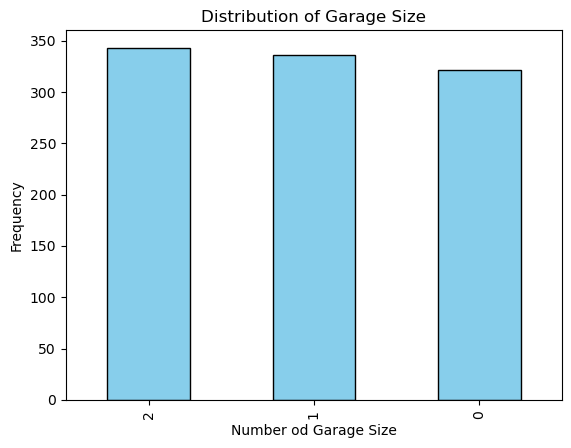

In [129]:
fig, ax = plt.subplots()
data["Garage_Size"].value_counts().plot(kind="bar", ax=ax, color='skyblue', edgecolor='black')
ax.set_title("Distribution of Garage Size")
ax.set_xlabel("Number od Garage Size")
ax.set_ylabel("Frequency")
plt.show()

In [130]:
#Same distribution as bathrooms and bedrooms
data["Neighborhood_Quality"].value_counts()

Neighborhood_Quality
10    123
5     109
2     105
7     102
6     101
4      99
8      97
1      91
9      88
3      85
Name: count, dtype: int64

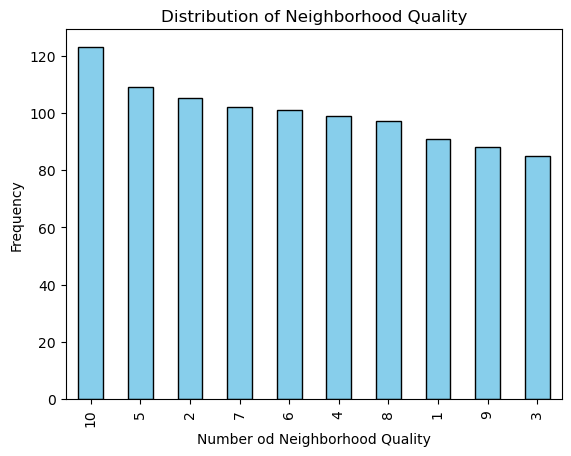

In [131]:
fig, ax = plt.subplots()
data["Neighborhood_Quality"].value_counts().plot(kind="bar", ax=ax, color='skyblue', edgecolor='black')
ax.set_title("Distribution of Neighborhood Quality")
ax.set_xlabel("Number od Neighborhood Quality")
ax.set_ylabel("Frequency")
plt.show()

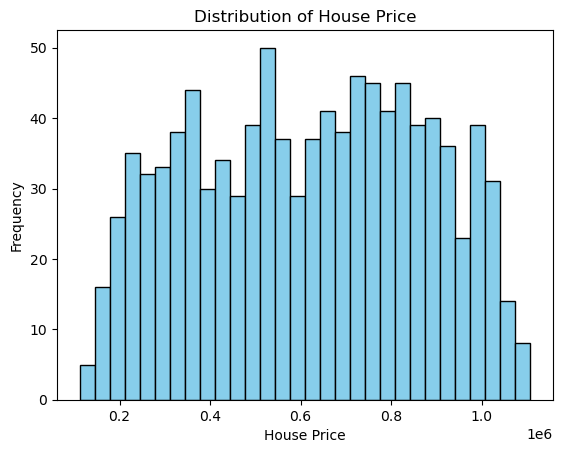

In [132]:
#So, we have here downgrade trend

fig, ax = plt.subplots()
data["House_Price"].plot(kind="hist", ax=ax, bins=30, color='skyblue', edgecolor='black')
ax.set_title("Distribution of House Price")
ax.set_xlabel("House Price")
ax.set_ylabel("Frequency")
plt.show()

In [133]:
#Our target variable have distribution similar to normal distribution
#Let's start multivariate analysis

data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


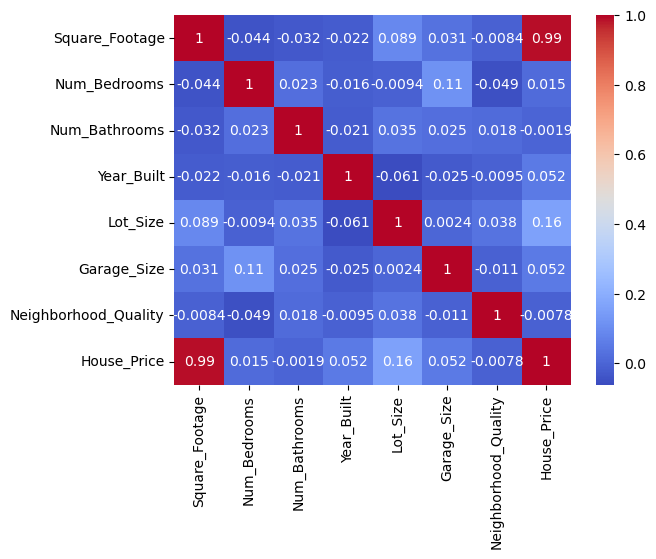

In [134]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

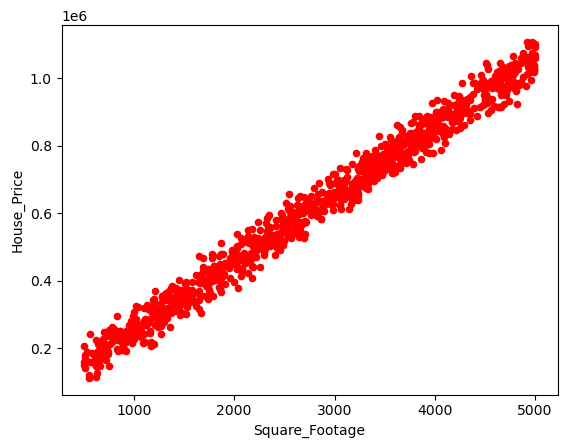

In [135]:
#We can see that our target is highly correlated with Square_Footage variable

fig, ax = plt.subplots()
data.plot("Square_Footage", "House_Price", kind = "scatter", ax = ax, color = "red")
plt.show()

In [136]:
#It's perfect linear trend so let's make linear regression model
#Let's split our data to trainig and test

X = data["Square_Footage"].values.reshape(-1, 1)
Y = data["House_Price"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 3.861e+04
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:15:36   Log-Likelihood:                -8298.9
No. Observations:                 700   AIC:                         1.660e+04
Df Residuals:                     698   BIC:                         1.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.245e+04   3174.486     16.522      0.0

In [145]:
X_test_sm = sm.add_constant(X_test)
Y_pred = model.predict(X_test_sm)

In [147]:
residuals = pd.DataFrame()
residuals["X"] = X_test.flatten()
residuals["Y"] = Y_test
residuals["Y_pred"] = Y_pred
residuals["Residuals"] = residuals["Y"] - residuals["Y_pred"]
std = residuals["Residuals"].std()
residuals["Std_Residuals"] = residuals["Residuals"] / std
residuals.head()

,X,Y,Y_pred,Residuals,Std_Residuals
0,2737,637736.010400,602370.569919,35365.440481,1.109243
1,2178,480961.442038,490055.283800,-9093.841762,-0.285230
2,1004,269874.715904,254173.090771,15701.625133,0.492484
3,955,267185.267642,244327.922578,22857.345064,0.716925
4,3224,705754.431978,700219.486449,5534.945530,0.173605


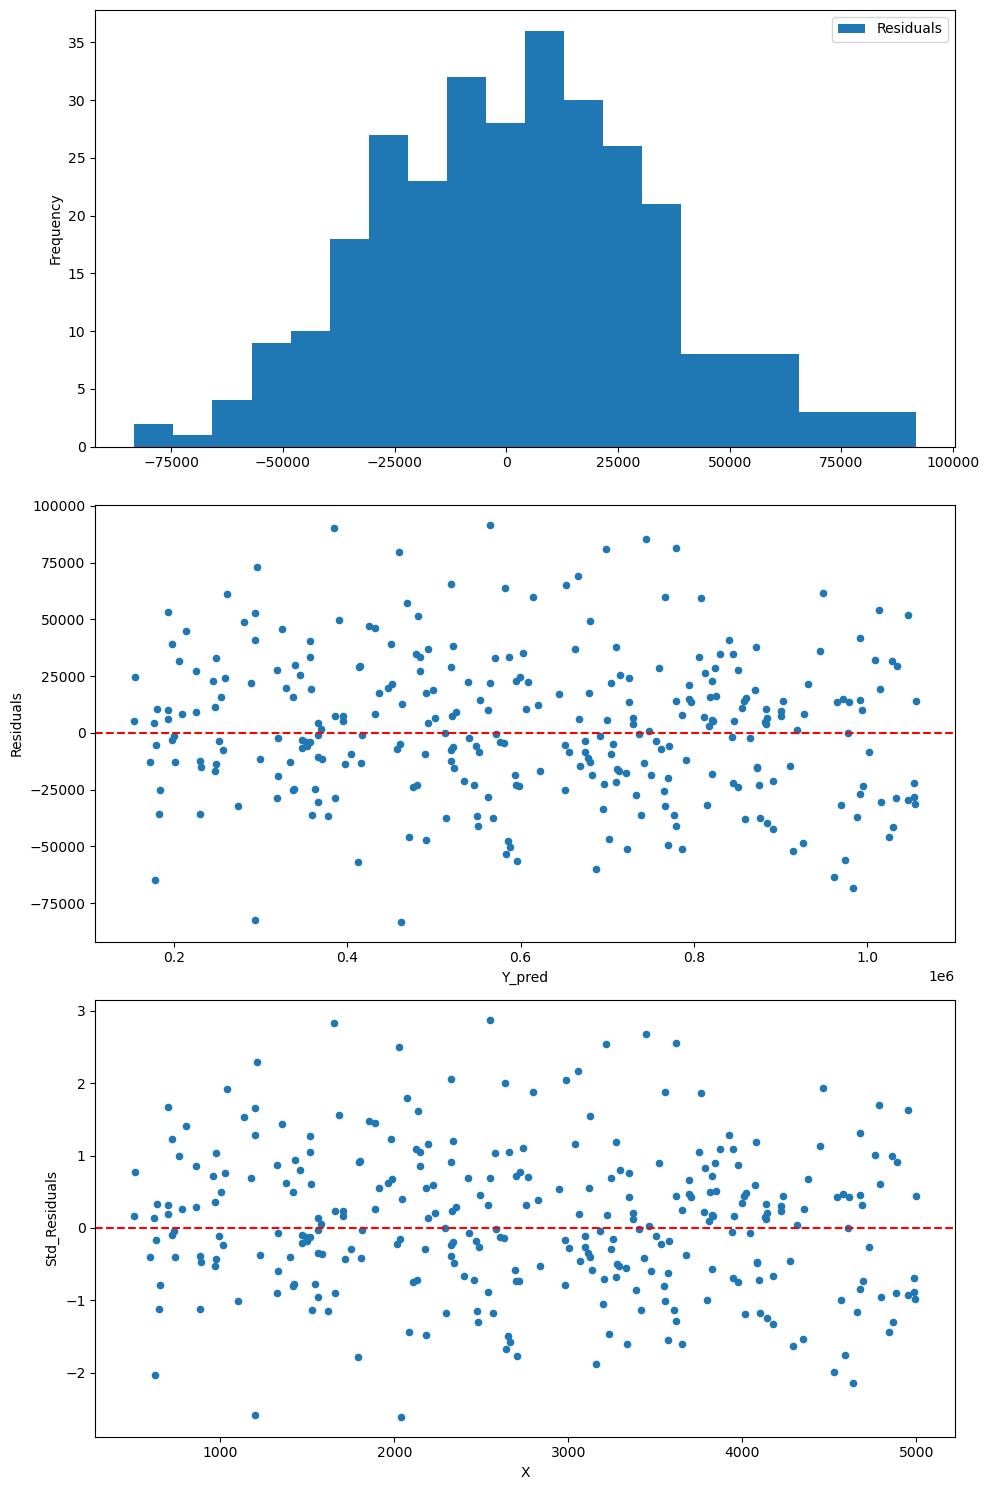

In [160]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, figsize = (10, 15))
residuals.plot(y = "Residuals", kind = "hist", ax = ax1, bins = 20)
residuals.plot(x = "Y_pred", y = "Residuals", kind = "scatter", ax = ax2)
ax2.axhline(y = 0, c = "red", linestyle = "dashed")
residuals.plot(x = "X", y = "Std_Residuals", kind = "scatter", ax = ax3)
ax3.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()  
plt.show()

In [ ]:
#From the residuals graph, we can conclude the following: The residuals are normally distributed, which means there are no signs of heteroskedasticity. 
#There is no funnel shape in the residuals and predicted values graph, indicating the presence of homoskedasticity. 
#Additionally, in the graph of standardized residuals and our independent variables, there are no patterns; 
#the residuals are randomly dispersed, suggesting no signs of overfitting or underfitting.
#Additionally, from the model summary, we can note that the R² metric is 0.98, which means we are explaining 98% of the variance in the data, which is excellent.
#The Durbin-Watson analysis is almost 2, indicating that there is no autocorrelation between the errors.